# Intro to Astropy

## Importing astropy

You could import all of astropy, which is a huge, huge library, but it is not recommended! Ideally you import a subpackage or a class within the subpackage that is relevant to the operations of the script at hand, which is what we'll be doing in the rest of the notebook

## Quantities

First go through the slides for an introduction, and then attempt the following problem:

Calculate the gravitational force between a 3 solar mass star and its 10 Jupiter mass planet 2 au away. 

In [1]:
# import the subpackages to save quantities as objects with units and have pre-defined constants
import astropy.units as u
import astropy.constants as c

### Examples with astropy.units

In [2]:
# create a velocity 
q = 15.1 * u.meter / (32.0 * u.second)
print(q.value)
print(q.unit)

0.471875
m / s


In [3]:
# create convert units
x = 1.0 * u.parsec
x.to(u.km)  

<Quantity 3.08567758e+13 km>

### Examples with astropy.constants

In [4]:
# what does a constant object entail?
print(c.G)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


### DIY

In [5]:
#masses with units of M_sun and M_jub

#distance with unit of au

#Calculate gravitational force using masses distance and the gravitational constant G


In [24]:
#Kütleler ve Mesafeler ile Gravitasyonel Kuvvet Hesaplama(Gravitational Force Calculation with Masses and Distances)
#Gerekli kütüphaneleri yükleyin
import astropy.units as u
import astropy.constants as c

# Kütleler
mass_star = 3 * u.M_sun  # Yıldızın kütlesi
mass_planet = 10 * u.M_jup  # Gezegenin kütlesi

# Mesafe
distance = 2 * u.au  # Yıldız ve gezegen arasındaki mesafe

# Gravitasyonel kuvveti hesaplama
force = c.G * (mass_star * mass_planet) / (distance ** 2)

# Kuvvetin Newton cinsinden değeri
force_newton = force.to(u.N)
print(f'Gravitasyonel Kuvvet: {force_newton}')


Gravitasyonel Kuvvet: 8.4420280425472e+25 N


## Input and Output

Bu bölümde, FITS (Flexible Image Transport System) dosyalarını okuma ve içeriğini inceleme işlemi yapılıyor. FITS dosyaları astronomik verilerin saklanmasında yaygın olarak kullanılır ve genellikle birçok veri bloğu (HDU - Header/Data Unit) içerir.

### Tables

Look at the slide for information

### FITS

In [25]:
fits_img_fn

'c:\\Users\\mawii\\anaconda3\\Lib\\site-packages\\astropy\\io\\fits\\tests\\data\\test0.fits'

In [14]:
# import i/o subpackage for reading FITS files
from astropy.io import fits

# Get path for data that came with astropy installation
fits_img_fn = fits.util.get_testdata_filepath('test0.fits')

# open HDU object for file and see what it contains
hdul = fits.open(fits_img_fn) # header data unit (HDU) list
hdul.info()

Filename: c:\Users\mawii\anaconda3\Lib\site-packages\astropy\io\fits\tests\data\test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


<class 'numpy.ndarray'>
(40, 40)
[[313 312 313 ... 312 313 313]
 [315 315 313 ... 312 314 313]
 [313 313 312 ... 314 312 313]
 ...
 [314 313 312 ... 312 313 311]
 [313 315 312 ... 313 313 312]
 [312 314 314 ... 314 311 314]]


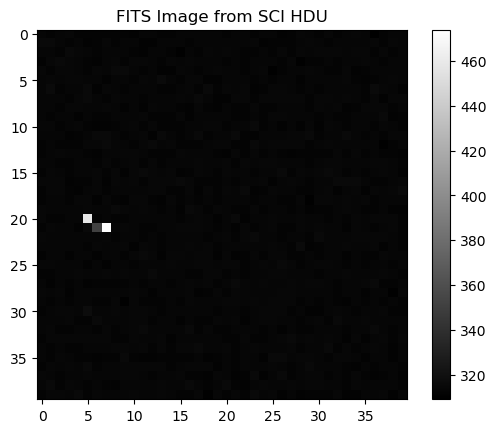

In [28]:
# 'SCI' HDU'sundan veriyi alın (örneğin, 1. HDU)
image_data = hdul[1].data

# Veriyi inceleyin
print(type(image_data))
print(image_data.shape)
print(image_data)

# Veriyi görselleştirme
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.title('FITS Image from SCI HDU')
plt.show()

In [22]:
# what does the data look like? how do you "get data" from the file?

fits.getdata

hdul[1].data


array([[313, 312, 313, ..., 312, 313, 313],
       [315, 315, 313, ..., 312, 314, 313],
       [313, 313, 312, ..., 314, 312, 313],
       ...,
       [314, 313, 312, ..., 312, 313, 311],
       [313, 315, 312, ..., 313, 313, 312],
       [312, 314, 314, ..., 314, 311, 314]], dtype='>i2')

In [29]:
# fits.getdata fonksiyonunu kullanarak veriyi alın
image_data_alternative = fits.getdata(fits_img_fn, ext=1)

# Veriyi inceleyin
print(type(image_data_alternative))
print(image_data_alternative.shape)
print(image_data_alternative)

<class 'numpy.ndarray'>
(40, 40)
[[313 312 313 ... 312 313 313]
 [315 315 313 ... 312 314 313]
 [313 313 312 ... 314 312 313]
 ...
 [314 313 312 ... 312 313 311]
 [313 315 312 ... 313 313 312]
 [312 314 314 ... 314 311 314]]


In [30]:
# Tablo verilerini alın
table_data = hdul[1].data

# İlk birkaç satırı görüntüleyin
print(table_data[:5])

[[313 312 313 314 312 312 312 312 312 312 311 313 313 312 312 313 313 313
  313 313 312 313 313 312 313 313 311 312 314 313 312 314 312 313 314 313
  309 312 313 313]
 [315 315 313 312 313 311 312 314 312 313 313 311 311 313 313 313 312 313
  313 313 313 313 313 314 311 312 312 312 313 314 313 312 313 313 313 313
  314 312 314 313]
 [313 313 312 315 314 313 312 313 313 313 312 311 313 313 312 310 313 312
  314 313 314 313 312 312 313 312 314 312 314 313 314 314 314 313 314 314
  312 314 312 313]
 [311 314 315 314 313 312 311 313 314 312 314 314 313 312 314 313 314 313
  313 313 312 313 312 313 313 313 312 314 310 312 312 313 312 313 313 314
  313 312 313 313]
 [314 312 314 314 313 312 314 313 315 315 313 312 313 311 311 314 313 312
  313 314 313 313 312 313 314 310 312 313 313 314 313 312 312 314 311 312
  313 313 313 313]]


## Planning Observations

Planning observations takes into account the targets, dates and times, location of observing, moon cycle, etc.

### Example: Looking at Fomalhaut

Here's a simple start-- You have to plan an observation of Fomalhaut from Subaru.

Gözlem planlama, hedeflerin, tarihler ve saatlerin, gözlem yapılacak yerin, ay döngüsünün vb. dikkate alınmasını içerir. Bu örnekte, Subaru Gözlemevi'nden Fomalhaut yıldızını gözlemlemeyi planlayacağız.

#### Step 1:  
The first step is to generate the coordinates of the star and the observing site. The packages here are a hint


In [19]:
#!pip install astroplan

In [31]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astroplan import Observer

# get coordinates of fomalhaut

# get observatory info and store its coordinates as an EarthLocation

In [32]:
# Fomalhaut'un gökyüzü koordinatlarını alın
fomalhaut = SkyCoord.from_name('Fomalhaut')
print(f'Sky Coords of Fomalhaut: {fomalhaut}')

Sky Coords of Fomalhaut: <SkyCoord (ICRS): (ra, dec) in deg
    (344.41269272, -29.62223703)>


In [33]:
# Subaru gözlemevi bilgilerini alın ve koordinatlarını EarthLocation olarak kaydedin
subaru = Observer.at_site('Subaru', timezone='US/Hawaii')
subaru_loc = EarthLocation(lat=subaru.latitude, lon=subaru.longitude)
print(f'Geocentric Coords of Subaru: {subaru_loc}')


Geocentric Coords of Subaru: (-5460925.6854608, -2491437.49064199, 2149539.83199706) m


Belirli Bir Tarihte Fomalhaut'un Görünebilirliğini Görselleştirme

Sky Coords of Fomalhaut: <SkyCoord (ICRS): (ra, dec) in deg
    (344.41269272, -29.62223703)>
Geocentric Coords of Subaru: (-5460925.6854608, -2491437.49064199, 2149539.83199706) m


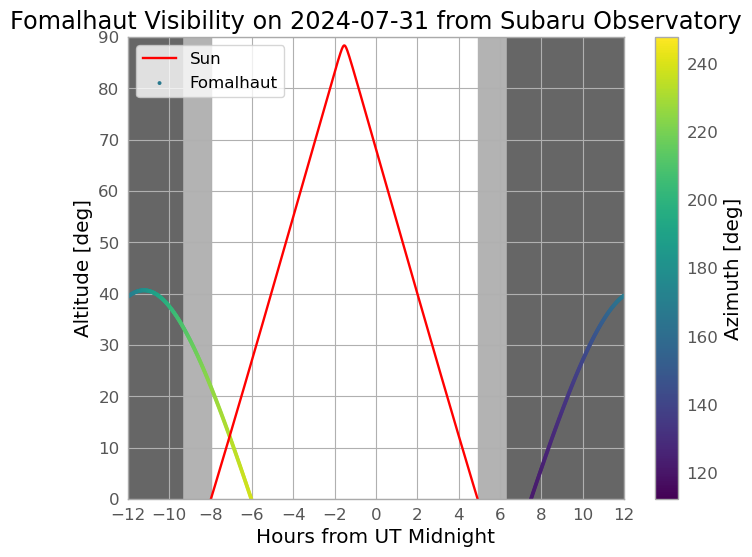

In [36]:
# Gerekli kütüphaneleri yükleyin
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
from astroplan import Observer
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
import astropy.units as u

plt.style.use(astropy_mpl_style)

# Fomalhaut'un gökyüzü koordinatlarını alın
fomalhaut = SkyCoord.from_name('Fomalhaut')
print(f'Sky Coords of Fomalhaut: {fomalhaut}')

# Subaru gözlemevi bilgilerini alın ve koordinatlarını EarthLocation olarak kaydedin
subaru = Observer.at_site('Subaru', timezone='US/Hawaii')
subaru_loc = EarthLocation(lat=subaru.latitude, lon=subaru.longitude)
print(f'Geocentric Coords of Subaru: {subaru_loc}')

# Belirli bir tarih için midnight zamanını tanımlayın
midnight = Time('2024-07-31 00:00:00')

# Bu zamanlar ve lokasyon için AltAz referans çerçevesini kurun
delta_midnight = np.linspace(-12, 12, 1000) * u.hour
times = midnight + delta_midnight
frame = AltAz(obstime=times, location=subaru_loc)

# Fomalhaut nesnesini Altitude/Azimuth koordinat sistemine dönüştürün
fomalhaut_altaz = fomalhaut.transform_to(frame)

# Güneşin konumunu alın
sun_altaz = get_sun(times).transform_to(frame)

# Görselleştirme
plt.figure()
plt.plot(delta_midnight.to_value(u.hour), sun_altaz.alt.to_value(u.deg), color='r', label='Sun')
plt.scatter(delta_midnight.to_value(u.hour), fomalhaut_altaz.alt.to_value(u.deg),
            c=fomalhaut_altaz.az.to_value(u.deg), label='Fomalhaut', lw=0, s=8,
            cmap='viridis')
plt.fill_between(delta_midnight.to_value(u.hour), 0, 90,
                 sun_altaz.alt < 0 * u.deg, color='0.7', zorder=0)
plt.fill_between(delta_midnight.to_value(u.hour), 0, 90,
                 sun_altaz.alt < -18 * u.deg, color='0.4', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(-12, 14, 2))
plt.ylim(0, 90)
plt.xlabel('Hours from UT Midnight')
plt.ylabel('Altitude [deg]')
plt.title('Fomalhaut Visibility on 2024-07-31 from Subaru Observatory')
plt.show()


#### Step 2:

Visualise and plot its visibility on a date of your choice

In [37]:
fomalhaut = SkyCoord.from_name('Fomalhaut')
subaru = Observer.at_site('Subaru', timezone ='US/Hawaii')
subaru_loc = EarthLocation(lat=subaru.latitude, lon=subaru.longitude)
print(f'Sky Coords of Fomalhaut: {fomalhaut} and Geocentric Coords of Subaru: {subaru_loc}')

Sky Coords of Fomalhaut: <SkyCoord (ICRS): (ra, dec) in deg
    (344.41269272, -29.62223703)> and Geocentric Coords of Subaru: (-5460925.6854608, -2491437.49064199, 2149539.83199706) m


In [38]:
# determine position for a give date: Let's say Jul 31 2024
from astropy.time import Time
# coz you'll need this
import numpy as np

# define midnight 
midnight = Time('2024-07-31 00:00:00')
# Define grid of times to calculate position over:
delta_midnight = np.linspace(-12, 12, 1000)*u.hour 
times = midnight + delta_midnight

# Set up AltAz reference frame for these times and location
frame= AltAz(obstime=times, location=subaru_loc)

# Now we transform the Fomalhaut object to the Altitute/Azimuth coordinate system
fomalhaut_altaz = fomalhaut.transform_to(frame)

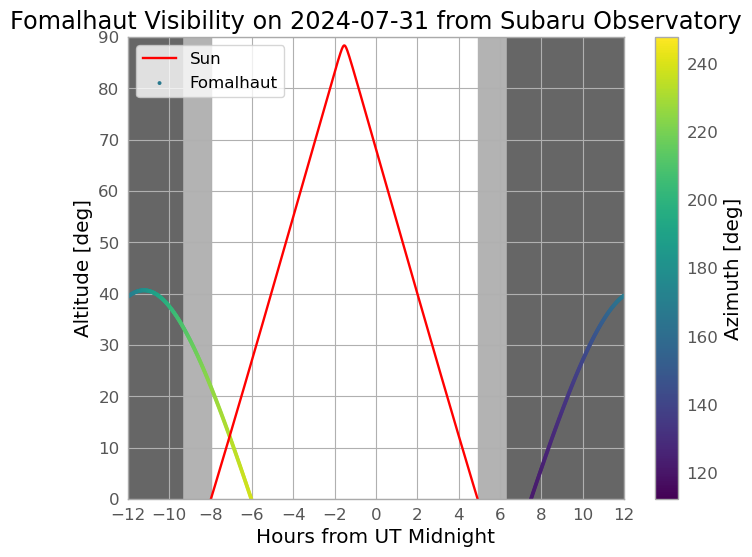

In [40]:
# Belirli bir tarih için midnight zamanını tanımlayın
midnight = Time('2024-07-31 00:00:00')

# Bu zamanlar ve lokasyon için AltAz referans çerçevesini kurun
delta_midnight = np.linspace(-12, 12, 1000) * u.hour
times = midnight + delta_midnight
frame = AltAz(obstime=times, location=subaru_loc)

# Fomalhaut nesnesini Altitude/Azimuth koordinat sistemine dönüştürün
fomalhaut_altaz = fomalhaut.transform_to(frame)

# Güneşin konumunu alın
sun_altaz = get_sun(times).transform_to(frame)

# Görselleştirme
plt.figure()
plt.plot(delta_midnight.to_value(u.hour), sun_altaz.alt.to_value(u.deg), color='r', label='Sun')
plt.scatter(delta_midnight.to_value(u.hour), fomalhaut_altaz.alt.to_value(u.deg),
            c=fomalhaut_altaz.az.to_value(u.deg), label='Fomalhaut', lw=0, s=8,
            cmap='viridis')
plt.fill_between(delta_midnight.to_value(u.hour), 0, 90,
                 sun_altaz.alt < 0 * u.deg, color='0.7', zorder=0)
plt.fill_between(delta_midnight.to_value(u.hour), 0, 90,
                 sun_altaz.alt < -18 * u.deg, color='0.4', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(-12, 14, 2))
plt.ylim(0, 90)
plt.xlabel('Hours from UT Midnight')
plt.ylabel('Altitude [deg]')
plt.title('Fomalhaut Visibility on 2024-07-31 from Subaru Observatory')
plt.show()

In [41]:
# now... can we see this source at night? this would depend on where the sun is
from astropy.coordinates import get_sun

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

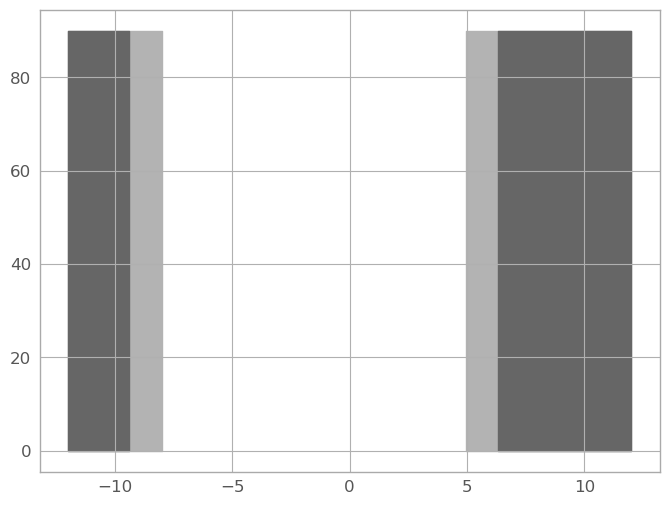

In [42]:
# for plotting
import matplotlib.pyplot as plt

# astropy's visualisation tool
from astropy.visualization import astropy_mpl_style


plt.style.use(astropy_mpl_style)

plt.figure()

# Plot the sun altitude


# Plot Fomalhaut's alt/az - use a colour map to represent azimuth. Scatter plot is advises


# Now plot the range when the sun is below the horizon, and at least 18 degrees below 
# the horizon - this shows the range of twilight (-0 to -18 deg) and night (< -18 deg)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sun_altaz.alt < 0*u.deg, color='0.7', zorder=0)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sun_altaz.alt < -18*u.deg, color='0.4', zorder=0)

#now for the details
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(-12, 14, 2))
plt.ylim(20, 90)
plt.xlabel('Hours from UT Midnight')
plt.ylabel('Altitude [deg]')
plt.show()


Sky Coords of Fomalhaut: <SkyCoord (ICRS): (ra, dec) in deg
    (344.41269272, -29.62223703)>
Geocentric Coords of Subaru: (-5460925.6854608, -2491437.49064199, 2149539.83199706) m


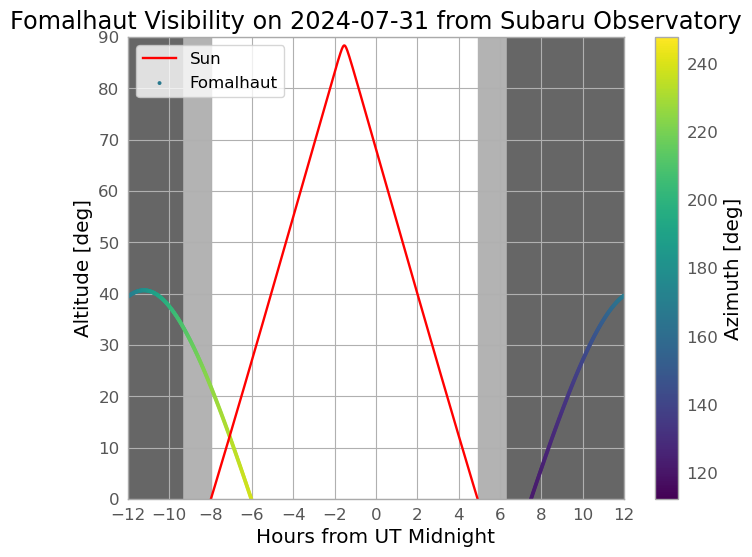

In [45]:
# Gerekli kütüphaneleri yükleyin
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
from astroplan import Observer
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
import astropy.units as u

plt.style.use(astropy_mpl_style)

# Fomalhaut'un gökyüzü koordinatlarını alın
fomalhaut = SkyCoord.from_name('Fomalhaut')

# Subaru gözlemevi bilgilerini alın ve koordinatlarını EarthLocation olarak kaydedin
subaru = Observer.at_site('Subaru', timezone='US/Hawaii')
subaru_loc = EarthLocation(lat=subaru.latitude, lon=subaru.longitude)

print(f'Sky Coords of Fomalhaut: {fomalhaut}')
print(f'Geocentric Coords of Subaru: {subaru_loc}')

# Belirli bir tarih için midnight zamanını tanımlayın
midnight = Time('2024-07-31 00:00:00')

# Bu zamanlar ve lokasyon için AltAz referans çerçevesini kurun
delta_midnight = np.linspace(-12, 12, 1000) * u.hour
times = midnight + delta_midnight
frame = AltAz(obstime=times, location=subaru_loc)

# Fomalhaut nesnesini Altitude/Azimuth koordinat sistemine dönüştürün
fomalhaut_altaz = fomalhaut.transform_to(frame)

# Güneşin konumunu alın
sun_altaz = get_sun(times).transform_to(frame)

# Görselleştirme
plt.figure()

# Güneşin yüksekliğini çizim
plt.plot(delta_midnight.to_value(u.hour), sun_altaz.alt.to_value(u.deg), color='r', label='Sun')

# Fomalhaut'un alt/az'ını çizim - azimutunu renk haritası olarak temsil eden bir scatter plot kullanımı
sc = plt.scatter(delta_midnight.to_value(u.hour), fomalhaut_altaz.alt.to_value(u.deg),
                 c=fomalhaut_altaz.az.to_value(u.deg), label='Fomalhaut', lw=0, s=8,
                 cmap='viridis')

# Güneşin ufkun altında ve en az 18 derece altında olduğu aralığı doldurun - bu alacakaranlık ve gece aralığını gösterir
plt.fill_between(delta_midnight.to_value(u.hour), 0, 90,
                 where=(sun_altaz.alt < 0 * u.deg).astype(int), color='0.7', zorder=0)
plt.fill_between(delta_midnight.to_value(u.hour), 0, 90,
                 where=(sun_altaz.alt < -18 * u.deg).astype(int), color='0.4', zorder=0)

# Ayrıntılar
plt.colorbar(sc).set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(-12, 14, 2))
plt.ylim(0, 90)
plt.xlabel('Hours from UT Midnight')
plt.ylabel('Altitude [deg]')
plt.title('Fomalhaut Visibility on 2024-07-31 from Subaru Observatory')
plt.show()
